Explode function

In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
df = pd.read_csv('data_jobs.csv')
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
type(df['job_skills'][1])

list

In [3]:
df_exploded = df.explode('job_skills')

In [4]:
skill_count = df_exploded.groupby(['job_title_short','job_skills']).size()

In [5]:
df_skill_count = skill_count.reset_index(name='skill_count')
df_skill_count = df_skill_count.sort_values(by='skill_count', ascending=False)
df_skill_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


In [6]:
job_title = 'Data Analyst'
total_count = 10

df_skill_final = df_skill_count[df_skill_count['job_title_short']==job_title].head(total_count)
df_skill_final

,job_title_short,job_skills,skill_count
625,Data Analyst,sql,92428
494,Data Analyst,excel,66860
590,Data Analyst,python,57190
638,Data Analyst,tableau,46455
583,Data Analyst,power bi,39380
594,Data Analyst,r,29996
606,Data Analyst,sas,27998
585,Data Analyst,powerpoint,13822
664,Data Analyst,word,13562
605,Data Analyst,sap,11280


Text(0, 0.5, 'Skils')

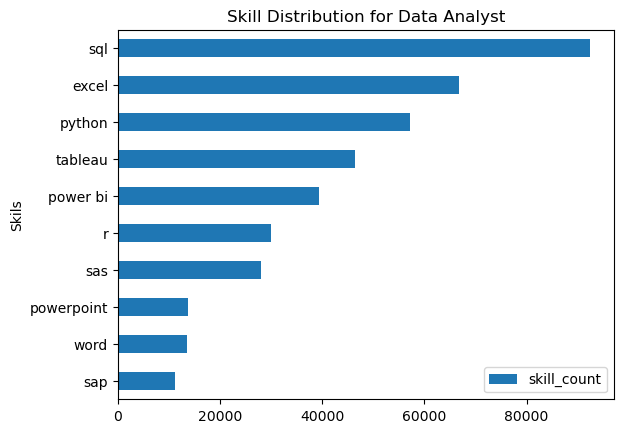

In [7]:
df_skill_final.plot(kind='barh', x='job_skills', y='skill_count')
plt.gca().invert_yaxis()
plt.title('Skill Distribution for Data Analyst')
plt.ylabel("Skils")